## Python solution of multiple regression example

Here we handle an extension of SLR that predicts a response using two or more features. 
To explain it mathematically, let us consider a dataser having n observation, p features (independent variables) and y as one response (dependent variable). So the regression line can be calculates as:

$$ h(x_i) = b_0 + b_1x_(i1) + b_2x_(i2) + ... + b_px_(ip) $$

Where, $h(x_i)$ is the predicted response value and $b_0, b_1, b_2...b_p$ are the regression coefficients.

Multiple Linear Regression also inclused the errors in data (residual error). To include this:
$$ h(x_i) = b_0 + b_1x_(i1) + b_2x_(i2) + ... + b_px_(ip) + e_i \\
so, y_i = h(x_i) + e_i \\
or, e_i = y_i - h(x_i) $$



Let us start the python implementation of a MLR problem.

In [10]:
# importing necessary packages

%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [9]:
#loading dataset

housing_data = datasets.fetch_california_housing(return_X_y= False)

x = housing_data.data
y = housing_data.target

#creating the dataframe
data = pd.DataFrame(x, columns = housing_data.feature_names)
data["target_value"] = housing_data.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
print(housing_data.DESCR) #let's check out the description of the dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [25]:
print(data.shape)         #shape of data

#splitting the data
#x = data.drop("target_value", axis=1)
#y = data["target_value"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=33)

(20640, 9)


In [15]:
#let's check out the assigned test and train size

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12384, 8)
(8256, 8)
(12384,)
(8256,)


In [26]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [27]:
#making predictions\
predictions = lr.predict(x_test)

print("Actual_value: ", y_test.iloc[0])
print("Predicted value: ", predictions[0])

Actual_value:  4.411
Predicted value:  3.3136998018316177


In [28]:
#evaluating the prediction
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean squared error: ", mse)
print("Root mean squared error:", rmse)

Mean squared error:  0.5233742791348898
Root mean squared error: 0.7234461134976743


In [29]:
#let's also chech the co-efficients
print("coefficients: ", lr.coef_)

coefficients:  [ 4.45655987e-01  8.99201170e-03 -1.21540167e-01  7.71021072e-01
 -9.35132092e-06 -3.08685365e-03 -4.17999605e-01 -4.31051899e-01]


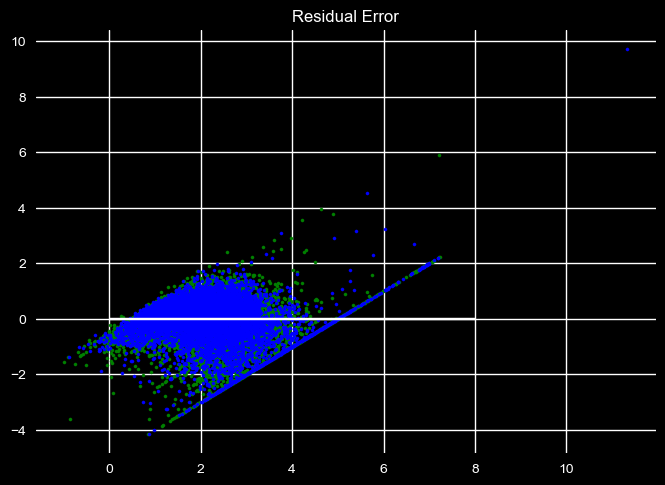

In [39]:
#finally, let's check out a scatterplot for train data and test data

plt.style.use("dark_background")
plt.scatter(lr.predict(x_train), lr.predict(x_train) - y_train,
            color = "green", s=5, label= "Train Data")
plt.scatter(lr.predict(x_test), lr.predict(x_test) - y_test,
            color = "blue", s=5, label= "Test Data")
plt.hlines(y=0, xmin=0, xmax=8)
plt.title("Residual Error")
plt.show()